In [2]:
import numpy as np
import sys

sys.path.append("/home/amurphy3/code/Github/cka_alignment/src")

from metrics import cka, gram_linear, RV2

np.random.seed(2024)

## Random Analysis

Define three times of matrix:
* low-data high-dimensionality
* high-data low-dimensionality
* equal 

Define a ratio 

In [3]:
N_REF_SAMPLES = 1024

ref_matrix = np.random.rand(N_REF_SAMPLES, N_REF_SAMPLES)
feature_dims = np.geomspace(start=10, stop=250_000, num=50).astype(int)

n_samples = ref_matrix.shape[0]

In [4]:
cka_biased = []
cka_debiased = []
rv2 = []

In [5]:
ref_gram = gram_linear(ref_matrix)

for feature_dim in feature_dims:

    test_matrix = np.random.rand(N_REF_SAMPLES, feature_dim)
    test_gram = gram_linear(test_matrix)

    cka_biased.append(cka(ref_gram, test_gram, debiased=False))
    cka_debiased.append(cka(ref_gram, test_gram, debiased=True))
    rv2.append(RV2(ref_matrix, test_matrix))


In [6]:
np.save(open('random_analysis_cka_biased.npy', 'wb'), np.array(cka_biased))
np.save(open('random_analysis_cka_debiased.npy', 'wb'), np.array(cka_debiased))
np.save(open('random_analysis_rv2.npy', 'wb'), np.array(rv2))

/tmp/ipykernel_12031/3475460512.py:20: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "filetype" which is no longer supported as of 3.3 and will become an error in 3.6
  plt.savefig('cka_rv2_random_matrices.svg', filetype='svg')


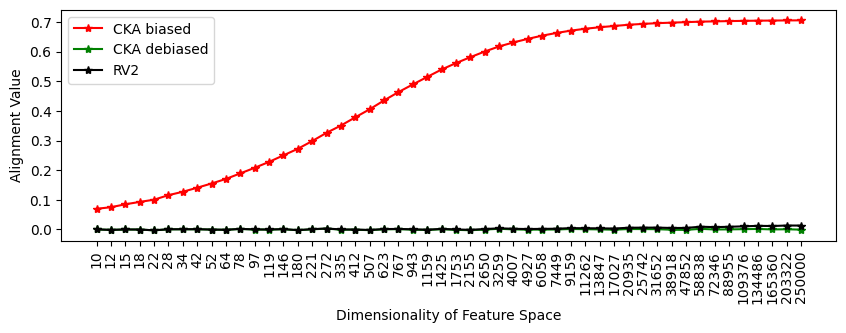

In [13]:
import matplotlib.pyplot as plt 
plt.rcParams["svg.fonttype"] = "none"
%matplotlib inline

fig, axis = plt.subplots(figsize=(10,3))
axis = np.ravel(axis)

new_xticks = range(len(feature_dims))
axis[0].plot(new_xticks, cka_biased, color='r', marker='*', label='CKA biased')
axis[0].plot(new_xticks, cka_debiased, color='g', marker='*', label='CKA debiased')
axis[0].plot(new_xticks, rv2, color='k', marker='*', label='RV2')

axis[0].set_xticks(new_xticks);
axis[0].set_xticklabels(feature_dims)
axis[0].set_ylabel('Alignment Value')
axis[0].set_xlabel('Dimensionality of Feature Space')
plt.xticks(rotation=90);

plt.legend()
plt.savefig('cka_rv2_random_matrices.svg', filetype='svg')

In [12]:
plt.rcParams['text.usetex'] = False